In [29]:
import numpy as np
import matplotlib.pyplot as plt 
import sys
sys.path.insert(0, '/Users/chris/GradResearch/SDSS_S82_FP_research/S82analysis/packages/')
import variabilityFunctions as varF



## Sinusoidal time series : value histogram 

Simulate a time series, sample at N equidistant points in time, plot the histogram of x : how likely are we to see a given value ? 

1) x = A sin(t)

In [3]:
#ls ../data_products/

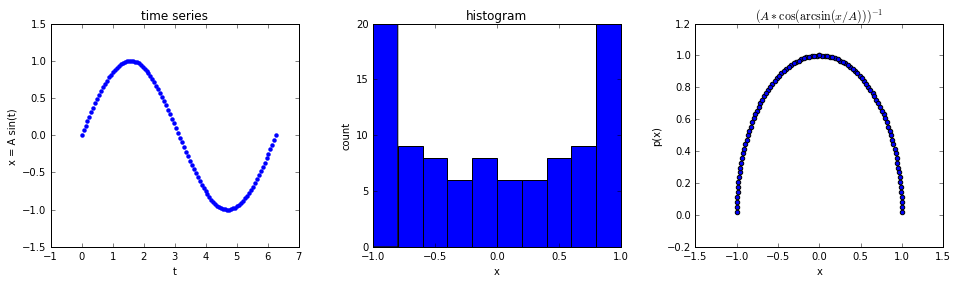

In [4]:
%matplotlib inline

t = np.linspace(0,2*np.pi, num=100)
A = 1 
x = A* np.sin(t)

fig, ax = plt.subplots(1,3, figsize=(16,4))
fig.subplots_adjust(wspace=0.3)
ax[0].set_title('time series')
ax[0].set_xlabel('t')
ax[0].set_ylabel('x = A sin(t)')
ax[0].scatter(t,x, lw=0)

ax[1].set_title('histogram')
ax[1].set_xlabel('x')
ax[1].set_ylabel('count')
ax[1].hist(x)

p = 1.0 / A * np.cos(np.arcsin(x/A))
ax[2].scatter(x,p)
ax[2].set_xlabel('x')
ax[2].set_ylabel('p(x)')
ax[2].set_title(r'$(A * \cos(\arcsin(x/A)))^{-1}$')
plt.savefig('../data_products/Fig0_sine_time_series.png')

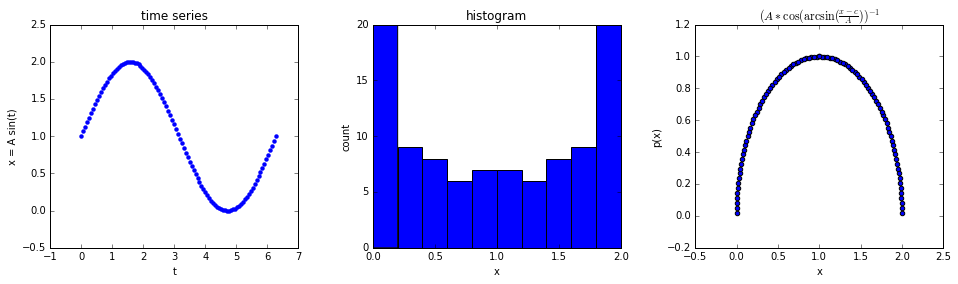

In [5]:
%matplotlib inline

t =  np.linspace(0,2*np.pi, num=100)
A = 1 
c = 1
x = A* np.sin(t) + c

fig, ax = plt.subplots(1,3, figsize=(16,4))
fig.subplots_adjust(wspace=0.3)
ax[0].set_title('time series')
ax[0].set_xlabel('t')
ax[0].set_ylabel('x = A sin(t)')
ax[0].scatter(t,x, lw=0)

ax[1].set_title('histogram')
ax[1].set_xlabel('x')
ax[1].set_ylabel('count')
ax[1].hist(x)

p = 1.0 / A * np.cos(np.arcsin((x-c)/A))
ax[2].scatter(x,p)
ax[2].set_xlabel('x')
ax[2].set_ylabel('p(x)')
ax[2].set_title(r'$(A * \cos(\arcsin(\frac{x-c}{A}))^{-1}$')
plt.savefig('../data_products/Fig0_sine_time_series_and_const.png')

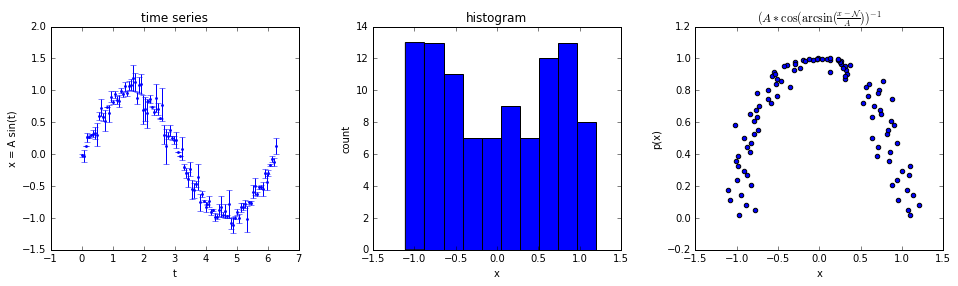

In [6]:
%matplotlib inline

t = np.linspace(0,2*np.pi, num=100)
A = 1 
c = np.random.normal(loc=0.0, scale=0.1, size=len(t))
x = A* np.sin(t) + c

fig, ax = plt.subplots(1,3, figsize=(16,4))
fig.subplots_adjust(wspace=0.3)
ax[0].set_title('time series')
ax[0].set_xlabel('t')
ax[0].set_ylabel('x = A sin(t)')
ax[0].scatter(t,x, lw=0, s=8)
ax[0].errorbar(t,x,c, ls='')

ax[1].set_title('histogram')
ax[1].set_xlabel('x')
ax[1].set_ylabel('count')
ax[1].hist(x)

p = 1.0 / A * np.cos(np.arcsin((x-c)/A))
ax[2].scatter(x,p)
ax[2].set_xlabel('x')
ax[2].set_ylabel('p(x)')
ax[2].set_title(r'$(A * \cos(\arcsin(\frac{x-\mathcal{N}}{A}))^{-1}$')
plt.savefig('../data_products/Fig0_sine_time_series_and_noise.png')

## Calculate sigma Fig. 5.8 for sinusoidal time series with mean of 1 and Gaussian noise zero mean and width sigma

Plot Fig. 5.8 for x = A sin(t) + $\mathcal{N}(0,\sigma)+1$

In [7]:
from imp import reload
reload(varF)

<module 'variabilityFunctions' from '/Users/chris/GradResearch/S13Agg/S82analysis/packages/variabilityFunctions.py'>

In [8]:
from astroML.plotting import setup_text_plots

def plot_astroml_five_eight(plot_data, mu_true=1, sig_true=None, suptitle=None, figtitle=None, plot_mean_stdev=False): 
    # Setup plots specifics
    #setup_text_plots(fontsize=15, usetex=False)
    # Analog of Fig. 5.8
    #--------------------------------------------------
    # Plot data
    fig, ax = plt.subplots(1,3,figsize=(16, 4))
    fig.subplots_adjust(left=0.1, right=0.95, wspace=0.25,
                        bottom=0.15, top=0.88)

    # first plot the histograms for mu
    #ax = fig.add_subplot(121)
    mu, sigma = plot_data['mu'], plot_data['sigma']
    p_mu, p_sigma = plot_data['p_mu'], plot_data['p_sigma']

    # plot the marginalized distribution
    ax[0].plot(mu,p_mu, '-k', label='marginalized')

    # plot the bootstrap distribution
    #bins = np.linspace(-3, 5, 14)
    ax[0].hist(plot_data['mu_boot'], histtype='step', linestyle='dashed',
            color='b', normed=True, label='approximate')

    # plot vertical line: newer matplotlib versions can use ax.vlines(x)
    #mu_true=1
    ax[0].axvline(mu_true, ls=':', color='k')
    #ax[0].axvline(np.mean(, ls=':', color='b')
    
    ax[0].set_xlabel(r'$\mu$')
    ax[0].set_ylabel(r'$p(\mu)$')
    ticks = ax[0].get_xticks()
    ax[0].set_xticks(ticks[1::2])
    #ax[0].set_xticks(ax.get_xticklabels()[::2], visible=False)
    #ax.set_ylim(0, 1.0)


    # first plot the histograms for sigma
    #ax = fig.add_subplot(122)

    # plot the marginalized distribution
    ax[1].plot(sigma, p_sigma, '-k', label='full')

    # plot the bootstrap distribution
    #bins = np.linspace(0, 5, 31)
    ax[1].hist(plot_data['sigma_boot'], histtype='step', linestyle='dashed',
            color='b', normed=True, label='approx')

    if plot_mean_stdev is True :  
        E = np.sum(p_sigma*sigma) / np.sum(p_sigma)
        stdev = np.sqrt(np.sum(sigma*sigma*p_sigma)/ np.sum(p_sigma)  - E*E)
        ax[1].axvline(E, color='green', ls='--')
        ax[1].axvline(E+stdev, color='red', ls='--')
        ax[1].axvline(E-stdev, color='red', ls='--')

    # plot vertical line: newer matplotlib versions can use ax.vlines(x)
    if sig_true is not None: 
        ax[1].axvline(sig_true, ls=':', color='k')

    ax[1].set_xlabel(r'$\sigma$')
    ax[1].set_ylabel(r'$p(\sigma)$')
    #ax[1].legend(loc=1, prop=dict(size=15))
    ticks = ax[1].get_xticks()
    ax[1].set_xticks(ticks[::2])
    #ax[1].set_xlim(0, 0.4)
    #ax[1].set_ylim(0, 1.0)
    # Analog of Fig. 5.7 
    # Print the Gaussian Distribution with Gaussian Errors  logarithm of the posterior probability density function 
    #------------------------------------------------------------
    # plot the results
    from astroML.plotting.mcmc import convert_to_stdev

    im = ax[2].imshow(plot_data['logL'], origin='lower',
               extent=(mu[0], mu[-1], sigma[0], sigma[-1]),
               cmap=plt.cm.binary,
               aspect='auto',vmin=-5, vmax=0)
    #cbar = plt.colorbar(im , ax=ax[2])
    #

    import matplotlib as mpl
    cax,kw = mpl.colorbar.make_axes([axis for axis in ax.flat])
    cbar = plt.colorbar(im, cax=cax, **kw)
    cbar.set_label(r'$\log(L)$')

    #cbar.set_clim(-5, 0)

    #plt.text(0.5, 0.93,
    #         (r'$L(\mu,\sigma)\ \mathrm{for}\ \bar{x}=1,\ '
    #          r'\sigma_{\rm true}=1,\ n=10$'),
    #         bbox=dict(ec='k', fc='w', alpha=0.9),
    #         ha='center', va='center', transform=plt.gca().transAxes)

    ax[2].contour(mu, sigma, convert_to_stdev(plot_data['logL']),
                levels=(0.683, 0.955, 0.997),
                colors='k')

    ax[2].set_xlabel(r'$\mu$')
    ax[2].set_ylabel(r'$\sigma$')
    #ax[2].set_xlim(23.84, 23.96)
    #ax[2].set_ylim(0,0.12)
    ticks = ax[2].get_xticks()
    if len(ticks) > 6 : 
        ax[2].set_xticks(ticks[::2])
        
    #plt.locator_params(axis=ax[2],nbins=4)
    #ticks = ax[2].get_yticks()
    #ax[2].set_yticks(ticks[::2])
    if suptitle is not None:
        fig.suptitle(suptitle, fontsize=15)
    #plt.tight_layout()
    name = '../data_products/'+figtitle
    #plt.tight_layout()
    plt.savefig(name)
    plt.show()
    plt.close(fig)
    

## Reproduce Fig 5.8 

I experiment with the size of sample (from original 10 points to 1000 points), and with the number of bootstrap resamples (varying between original 10000 and 1000). The sample size corresponds to  a size of any given lightcurve, 50-150 points is the expected size. Number of bootstraps is less obvious - in the original figure 5.8 there were only 10 sample points but as many as 10000 resamples.... 

N=10, Nboot=1000


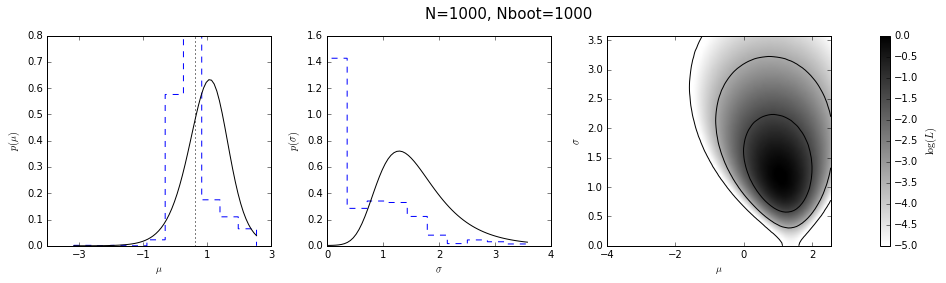

In [9]:
# Investigate N=1000,  Nboot=1000 case 

N=10
Nboot=1000

np.random.seed(5)
ei = 3 * np.random.random(N)
xi = np.random.normal(1 , np.sqrt(1+ei**2.0))
print('N=%d, Nboot=%d'%(N,Nboot))
plot_data, mu_flux, sigma_flux = varF.get_mu_sigma(xi,ei,  N_boot=Nboot, return_plot_data=True)
import gc ; gc.collect()
plot_astroml_five_eight(plot_data , mu_true=np.mean(xi), suptitle='N=1000, Nboot=1000',figtitle = 'Fig_5.8_N-'+str(N)+'_N_boot-'+str(Nboot)+'.png')

In [10]:
ei

array([ 0.66597951,  2.61219692,  0.62015747,  2.75583272,  1.46523357,
        1.83523159,  2.29772357,  1.55525396,  0.8904015 ,  0.56316369])

N=10, Nboot=1000


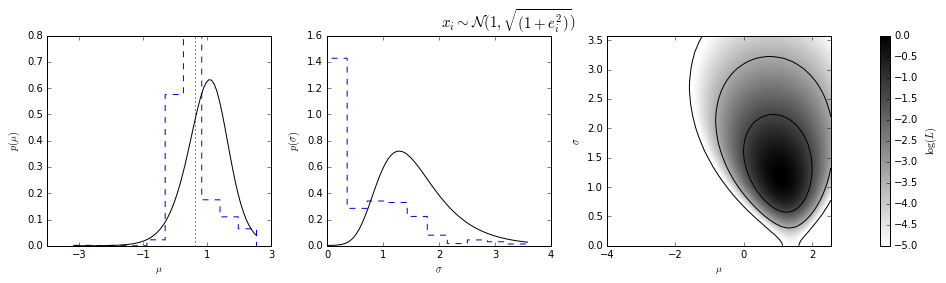

N=10, Nboot=1000


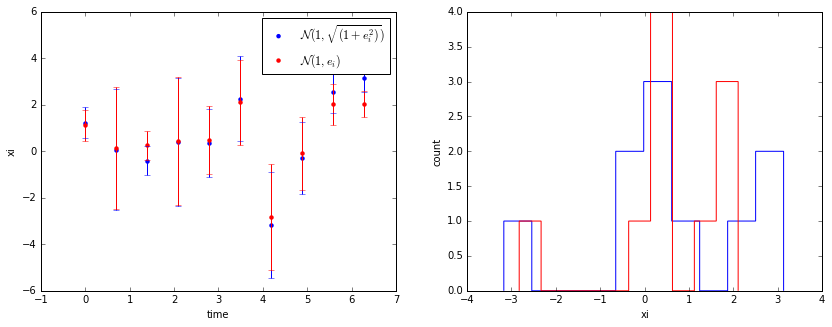

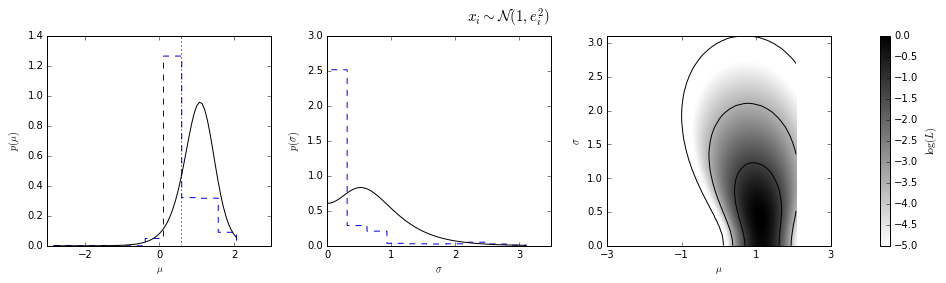

In [11]:
# Simulate random data with some added intrinsic variability sigma == 1 

Nboot=1000

np.random.seed(5)
N=10
t = np.linspace(0,2*np.pi, num=N)

ei = 3 * np.random.random(len(t))
sigma_true= 1
xi = np.random.normal(1 , np.sqrt(sigma_true**2.0 + ei**2.0))
print('N=%d, Nboot=%d'%(N,Nboot))
plot_data, mu_flux, sigma_flux = varF.get_mu_sigma(xi,ei,  N_boot=Nboot, return_plot_data=True)
import gc ; gc.collect()
plot_astroml_five_eight(plot_data , mu_true=np.mean(xi), 
                        suptitle=r'$x_{i} \sim \mathcal{N}(1,\sqrt{(1+e_{i}^{2})})$',
                        figtitle = 'Fig_5.8_1_N-'+str(N)+'_N_boot-'+str(Nboot)+'_var.png')


fig,ax = plt.subplots(1,2, figsize=(14,5))

ax[0].set_xlabel('time')
ax[0].set_ylabel('xi')

ax[1].set_xlabel('xi')
ax[1].set_ylabel('count')

ax[0].scatter(t,xi,lw=0, label=r'$\mathcal{N}(1,\sqrt{(1+e_{i}^{2})})$')
ax[0].errorbar(t,xi,ei, ls='')


ax[1].hist(xi,histtype='step')

# Simulate random data without any intrinsic variability ... 

np.random.seed(5)
t = np.linspace(0,2*np.pi, num=N)

ei = 3 * np.random.random(len(t))
sigma_true= 1
xi = np.random.normal(1 , np.sqrt(ei**2.0))


ax[0].scatter(t,xi,lw=0, color='red',label=r'$\mathcal{N}(1,e_{i})$')
ax[0].errorbar(t,xi,ei, ls='', color='red')
ax[0].legend(scatterpoints=1)

ax[1].hist(xi,  histtype='step', color='red')

print('N=%d, Nboot=%d'%(N,Nboot))
plot_data, mu_flux, sigma_flux = varF.get_mu_sigma(xi,ei,  N_boot=Nboot, return_plot_data=True)
import gc ; gc.collect()
plot_astroml_five_eight(plot_data , mu_true=np.mean(xi), suptitle=r'$x_{i} \sim \mathcal{N}(1,e_{i}^{2})$', 
                        figtitle = 'Fig_5.8_1_N-'+str(N)+'_N_boot-'+str(Nboot)+'_novar.png')






In [441]:
a = 5 
str(5).zfill(3)

'005'

N=10, Nboot=1000


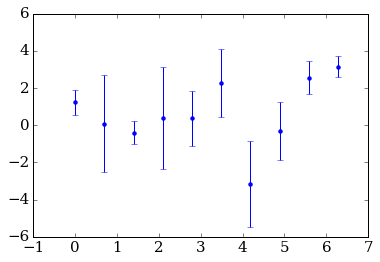

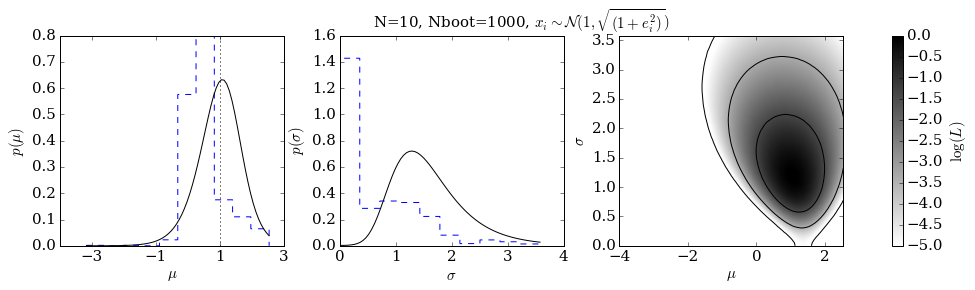

N=10, Nboot=10000


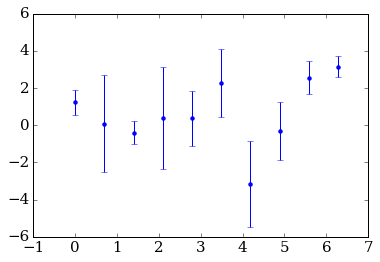

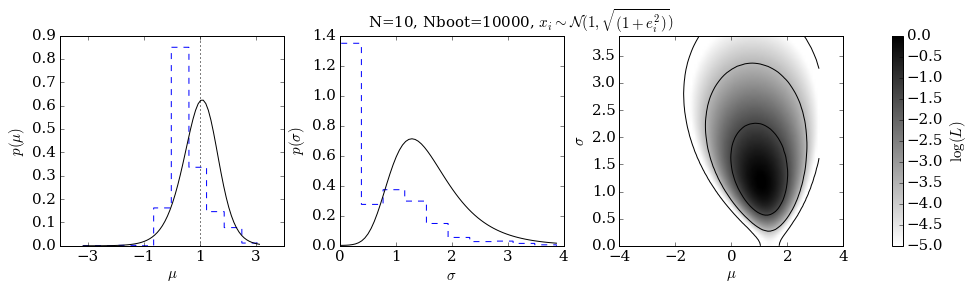

N=100, Nboot=1000


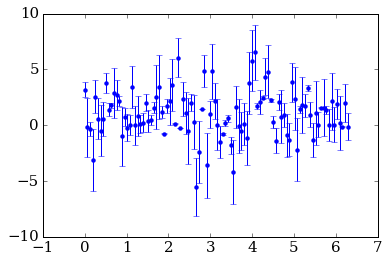

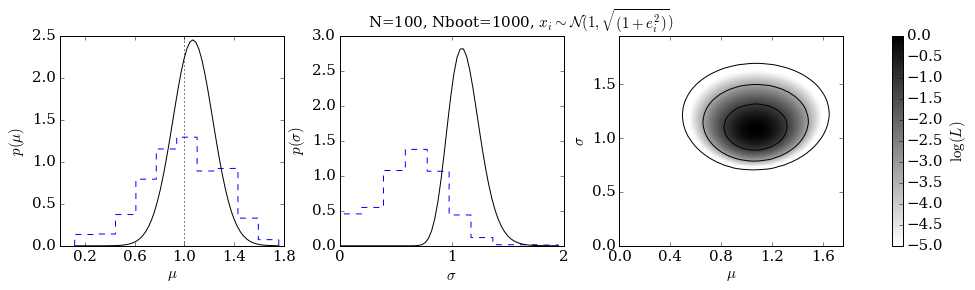

N=100, Nboot=10000


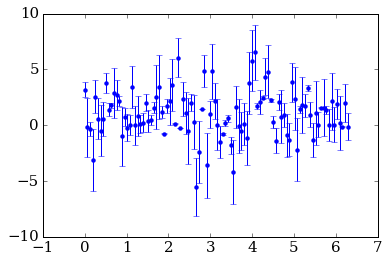

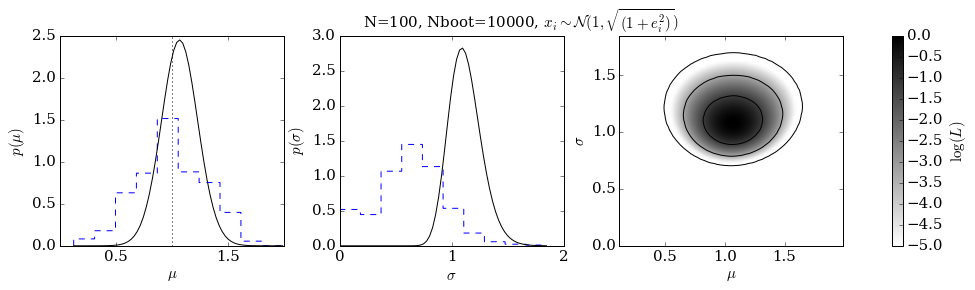

N=1000, Nboot=1000


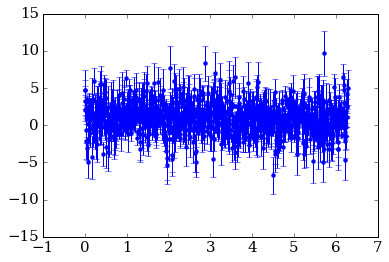

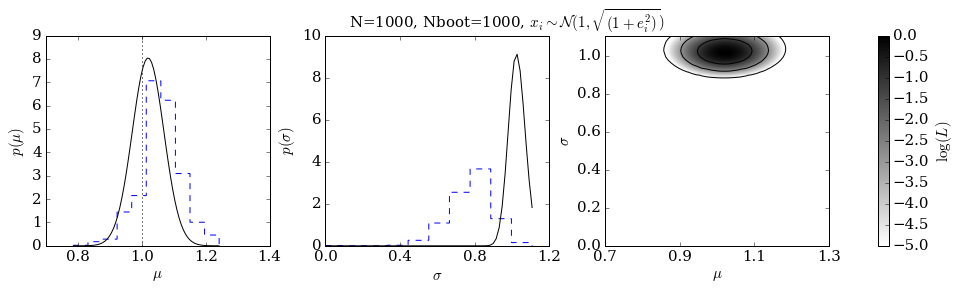

N=1000, Nboot=10000


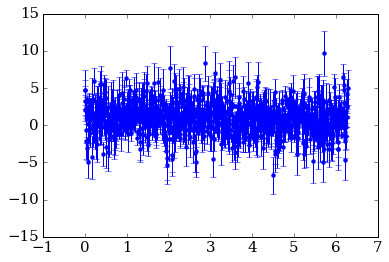

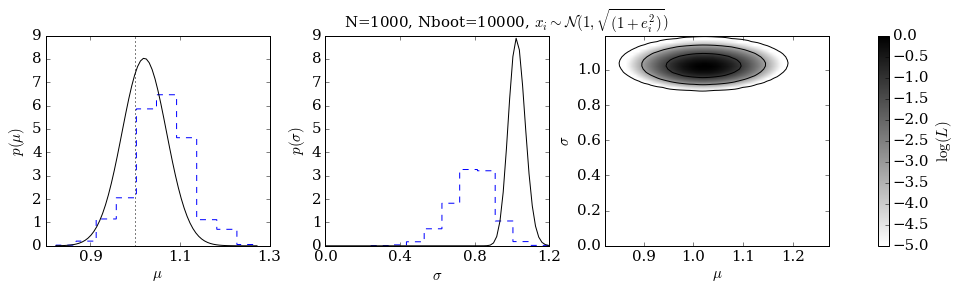

In [451]:
import matplotlib.pyplot as plt 
#np.random.seed(5)
i = 0
for N in [10,100,1000]:
    for Nboot in [1000,10000]:
        
        np.random.seed(5)
        t = np.linspace(0,2*np.pi, num=N)
        ei = 3 * np.random.random(N)
        xi = np.random.normal(1 , np.sqrt(1+ei**2.0))
        
        # make a figure of the time series 
        fig,ax = plt.subplots()
        label = r'$ x_{i} \sim \mathcal{N}(1,\sqrt{(1+e_{i}^{2})})$'
        ax.scatter(t,xi, lw=0, label=label)
        ax.errorbar(t,xi,ei, ls='')
        #ax.set_ylim(0,2)
        plt.savefig('../data_products/'+'Fig_5.8_series_'+str(i).zfill(2)+'.png')
    
        print('N=%d, Nboot=%d'%(N,Nboot))
        plot_data, mu_flux, sigma_flux = varF.get_mu_sigma(xi,ei,  N_boot=Nboot, return_plot_data=True)
        import gc ; gc.collect()
        # set the suptitle for figure and filename 
        sup = 'N='+str(N)+', Nboot='+str(Nboot)+', '+r'$ x_{i} \sim \mathcal{N}(1,\sqrt{(1+e_{i}^{2})})$'
        figt = 'Fig_5.8_random_'+str(i).zfill(2)+'_N-'+str(N)+'_N_boot-'+str(Nboot)+'.png'
        plot_astroml_five_eight(plot_data ,  suptitle=sup, figtitle = figt)
        i += 1 

## Fig 5.8 for sinusoidal time series w/ Gaussian noise

Amin = 1.897367
mean of xi=0.943981
sigma=2.000000


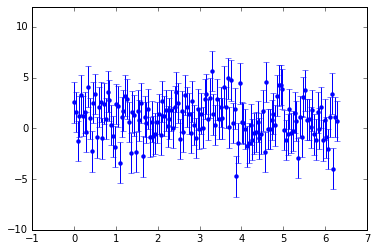

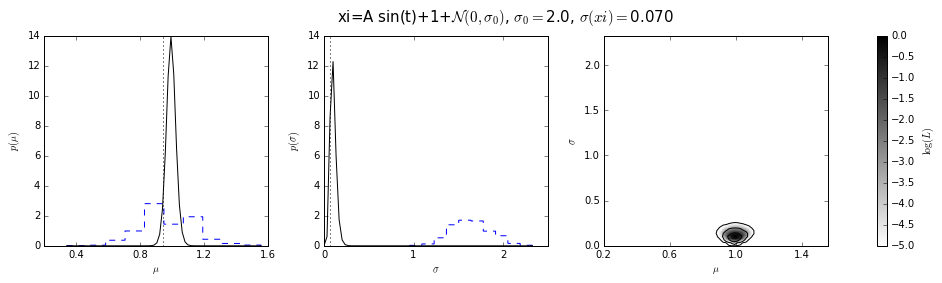

In [13]:
%matplotlib inline

N = 100
Nboot = 1000

t = np.linspace(0,2*np.pi, num=150)
A = 0.1
sigma = [2.0] # [0.001, 0.005, 0.01, 0.02, 0.1, 0.2, 0.3, 0.5, 1]
 # that is 0.1%,  0.5%, 1%, 2%, 3%, 5% 

i = 0
for sig in sigma:
    
    ei = np.random.normal(loc=0.0, scale=sig, size=len(t)) 
    #gaussian = np.random.normal(loc=0.0, scale=ei, size=len(t))
    xi = A* np.sin(t) + 1 + ei
    
    # make a figure of the time series 
    fig,ax = plt.subplots()
    label = 'xi=A sin(t)+1+'+r'$\mathcal{N}(0,\sigma)$'+ ', '+r'$\sigma=$'+str(sig)
    ax.scatter(t,xi, lw=0, label=label)
    ax.errorbar(t,xi,sig, ls='')
    ax.set_ylim(-10,12)
    plt.savefig('../data_products/'+'Fig_5.8_series_'+str(i).zfill(2)+'.png')
    print('Amin = %f'%(3*sig / N**(0.25)))
    print('mean of xi=%f'%np.mean(xi))
    print('sigma=%f'%sig)
    # do it in flux space ... 
    plot_data, mu_flux, sigma_flux = varF.get_mu_sigma(xi,ei, N_boot=Nboot, return_plot_data=True)
    import gc ; gc.collect()
    sig_exp = np.sqrt(A*A / 2.0 )
    sup = 'xi=A sin(t)+1+'+r'$\mathcal{N}(0,\sigma_{0})$'+ ', '+r'$\sigma_{0}=$'+str(sig)+', '+\
           r'$\sigma(xi)=$'+str(sig_exp)[:5]
    figt = 'Fig_5.8_sin_'+str(i).zfill(2)+'_sigma-'+str(sig)+'_N-'+str(N)+'_N_boot-'+str(Nboot)+'.png'
    plot_astroml_five_eight(plot_data , mu_true=np.mean(xi), sig_true=A/np.sqrt(2), 
                            suptitle=sup, figtitle = figt)
    i += 1 

mean of xi=0.989325
sigma=0.100000


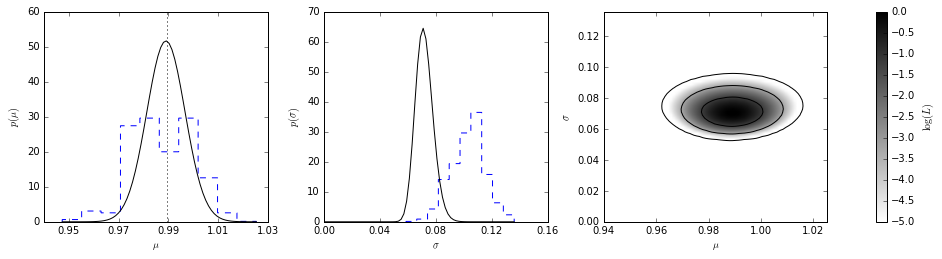

(array([  1.,   0.,   3.,   4.,   6.,  13.,  17.,  17.,  15.,  24.,  14.,
         11.,  10.,   5.,   5.,   1.,   1.,   1.,   1.,   1.]),
 array([ 0.67164198,  0.70715976,  0.74267754,  0.77819531,  0.81371309,
         0.84923087,  0.88474865,  0.92026642,  0.9557842 ,  0.99130198,
         1.02681976,  1.06233753,  1.09785531,  1.13337309,  1.16889087,
         1.20440864,  1.23992642,  1.2754442 ,  1.31096197,  1.34647975,
         1.38199753]),
 <a list of 1 Patch objects>)

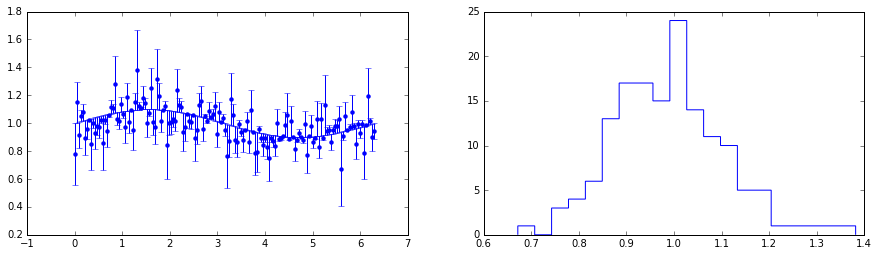

In [14]:

# Plot also histogram of xi values to see how the width of the distribution originates solely from the amplitude 
# of sinusoidal oscillation, but it gets broader as the error increases, i.e. it is harder to see that there 
# is any underlying variability if the error  becomes too large 

%matplotlib inline

N = 100
Nboot = 1000

t = np.linspace(0,2*np.pi, num=150)
A = 0.1
sigma = [0.001, 0.005, 0.01, 0.02, 0.1, 0.2, 0.3, 0.5]
 # that is 0.1%,  0.5%, 1%, 2%, 3%, 5% 
    
sig=0.1
ei = np.random.normal(loc=0.0, scale=sig, size=len(t))
xi = A* np.sin(t) + 1 + ei
print('mean of xi=%f'%np.mean(xi))
print('sigma=%f'%sig)
# do it in flux space ... 
plot_data, mu_flux, sigma_flux = varF.get_mu_sigma(xi,ei, N_boot=Nboot, return_plot_data=True)
import gc ; gc.collect()
plot_astroml_five_eight(plot_data , mu_true=np.mean(xi),figtitle = 'Fig_5.8_sin_N-'+str(N)+'_N_boot-'+str(Nboot)+'.png')

fig,ax = plt.subplots(1,2, figsize=(15,4))
ax[0].scatter(t,xi,lw=0)
ax[0].errorbar(t,xi,ei,ls='')
ax[1].hist(xi, histtype='step', bins=20)

## Sinusoidal time series with Gaussian Noise: statistical properties 

We generate the time series:  $x(t) = A \sin{(t)} + 1 + \mathcal{N}(0,\sigma_{0})$. 
    
We fix $\sigma_{0} = 0.1$, $N_{points} = 100$, and make use of the AstroML 5.8 code $10^{4}$ times. At each iteration calculate :
* $\chi^{2}_{DOF} = \frac{1}{N}  \sum((x_{i} - 1  ) /  \sigma_{0})^{2}$
* mean : $\langle \sigma_{int} \rangle = \frac{\sum \sigma p(\sigma_{int})}{\sum p(\sigma_{int})}  $ 
* standard deviation : stdev($\sigma_{int}$) = $\left(\frac{\sum \sigma_{int}^{2}p(\sigma_{int}) } {\sum p(\sigma_{int})} - \langle \sigma_{int} \rangle^{2} \right) ^{1/2}$

In [61]:
np.linspace(0.01, 1, 100)

array([ 0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,  0.09,
        0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,  0.18,
        0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.26,  0.27,
        0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,  0.36,
        0.37,  0.38,  0.39,  0.4 ,  0.41,  0.42,  0.43,  0.44,  0.45,
        0.46,  0.47,  0.48,  0.49,  0.5 ,  0.51,  0.52,  0.53,  0.54,
        0.55,  0.56,  0.57,  0.58,  0.59,  0.6 ,  0.61,  0.62,  0.63,
        0.64,  0.65,  0.66,  0.67,  0.68,  0.69,  0.7 ,  0.71,  0.72,
        0.73,  0.74,  0.75,  0.76,  0.77,  0.78,  0.79,  0.8 ,  0.81,
        0.82,  0.83,  0.84,  0.85,  0.86,  0.87,  0.88,  0.89,  0.9 ,
        0.91,  0.92,  0.93,  0.94,  0.95,  0.96,  0.97,  0.98,  0.99,  1.  ])

In [63]:
%matplotlib inline

# parameters to tweak  
N = 100.0
Nboot = 1000
A_values =  np.linspace(0.01, 1, 100)  #[0.01, 0.1, 0.7,1]
sigma_0 = 1.0
N_iterations = 1000

#sigma = [1.0] # [0.001, 0.005, 0.01, 0.02, 0.1, 0.2, 0.3, 0.5, 1]
# that is 0.1%,  0.5%, 1%, 2%, 3%, 5% 

# counter for printing pictures in order 
i = 0

# initialize the time array 
t = np.linspace(0,2*np.pi, num=N)

stats = {}  # array to store values 
for A in A_values : 
    print(' A value is %f' % A)
    stats[A] = {}
    stats[A]['mean'] = np.zeros(N_iterations)
    stats[A]['stdev'] = np.zeros(N_iterations)
    stats[A]['chi2dof'] = np.zeros(N_iterations)

    for k in range(N_iterations):

        # define the time series 
        ei = np.random.normal(loc=0.0, scale=sigma_0, size=len(t)) 
        xi = A* np.sin(t) + 1 + ei

        # make a figure of the time series
        plot_time_series = False
        if plot_time_series == True  : 
            fig,ax = plt.subplots()
            #label = 'xi=A sin(t)+1+'+r'$\mathcal{N}(0,\sigma)$'+ ', '+r'$\sigma=$'+str(sigma_0)
            ax.scatter(t,xi, lw=0, label=label)
            ax.errorbar(t,xi,sigma_0, ls='')
            #ax.set_ylim(-10,12)
            #plt.savefig('../data_products/'+'Fig_5.8_series_'+str(i).zfill(2)+'.png')
            #print('Amin = %f'%(3*sigma_0 / N**(0.25)))
            #print('mean of xi=%f'%np.mean(xi))
            #print('sigma=%f'%ssigma_0)

        # Fig 5.8 calculation
        plot_data, mu_flux, sigma_flux = varF.get_mu_sigma(xi,ei, N_boot=Nboot, return_plot_data=True)

        #  calculate mean, standard deviation, chi2_DOF for p_sigma 
        p_sigma = plot_data['p_sigma'] 
        sigma_int = plot_data['sigma']
        mean = np.sum(p_sigma*sigma_int) / np.sum(p_sigma)
        stdev = np.sqrt(np.sum(sigma_int*sigma_int*p_sigma)/ np.sum(p_sigma)  - mean**2.0 )
        #print('mean=%f, stdev=%f'%(E,stdev))
        data  = xi
        model = 1
        error = sigma_0
        chi_sq_dof = np.sum(((data - model)/ error)**2.0) / N  

        stats[A]['mean'][k]    = mean
        stats[A]['stdev'][k]   = stdev
        stats[A]['chi2dof'][k] = chi_sq_dof

        # store in a dictionary 
        plot_posterior =  False
        if plot_posterior == True : 
            import gc ; gc.collect()
            sig_exp = np.sqrt(A*A / 2.0 )
            sup = 'xi=A sin(t)+1+'+r'$\mathcal{N}(0,\sigma_{0})$'+ ', '+r'$\sigma_{0}=$'+str(sigma_0)+', '+\
                   r'$\sigma(xi)=$'+str(sig_exp)[:5]
            figt = 'Fig_5.8_sin_'+str(i).zfill(2)+'_sigma-'+str(sig)+'_N-'+str(N)+'_N_boot-'+str(Nboot)+'.png'

            # diagnostics : plot to show how the mean and standard deviation of sigma are calculated 
            plot_astroml_five_eight(plot_data , mu_true=np.mean(xi), sig_true=sig_exp, 
                                    suptitle=sup, figtitle = figt, plot_mean_stdev=True)



        i += 1 
print('finished')

 A value is 0.010000
 A value is 0.020000
 A value is 0.030000
 A value is 0.040000
 A value is 0.050000
mu at the last grid point
 A value is 0.060000
mu at the last grid point
 A value is 0.070000
 A value is 0.080000
mu at the last grid point
 A value is 0.090000
 A value is 0.100000
mu at the last grid point
 A value is 0.110000
 A value is 0.120000
 A value is 0.130000
mu at the last grid point
 A value is 0.140000
mu at the last grid point
 A value is 0.150000
 A value is 0.160000
mu at the last grid point
 A value is 0.170000
 A value is 0.180000
mu at the last grid point
 A value is 0.190000
 A value is 0.200000
mu at the last grid point
 A value is 0.210000
 A value is 0.220000
 A value is 0.230000
mu at the last grid point
 A value is 0.240000
 A value is 0.250000
 A value is 0.260000
 A value is 0.270000
 A value is 0.280000
 A value is 0.290000
 A value is 0.300000
 A value is 0.310000
 A value is 0.320000
 A value is 0.330000
 A value is 0.340000
 A value is 0.350000
 A va

Number of iterations is 1000
For A=0.010000, we expect <S/N> = 0.070711
For A=0.020000, we expect <S/N> = 0.141421
For A=0.030000, we expect <S/N> = 0.212132
For A=0.040000, we expect <S/N> = 0.282843
For A=0.050000, we expect <S/N> = 0.353553
For A=0.060000, we expect <S/N> = 0.424264
For A=0.070000, we expect <S/N> = 0.494975
For A=0.080000, we expect <S/N> = 0.565685
For A=0.090000, we expect <S/N> = 0.636396
For A=0.100000, we expect <S/N> = 0.707107
For A=0.110000, we expect <S/N> = 0.777817
For A=0.120000, we expect <S/N> = 0.848528
For A=0.130000, we expect <S/N> = 0.919239
For A=0.140000, we expect <S/N> = 0.989949
For A=0.150000, we expect <S/N> = 1.060660
For A=0.160000, we expect <S/N> = 1.131371
For A=0.170000, we expect <S/N> = 1.202082
For A=0.180000, we expect <S/N> = 1.272792
For A=0.190000, we expect <S/N> = 1.343503
For A=0.200000, we expect <S/N> = 1.414214
For A=0.210000, we expect <S/N> = 1.484924
For A=0.220000, we expect <S/N> = 1.555635
For A=0.230000, we expect

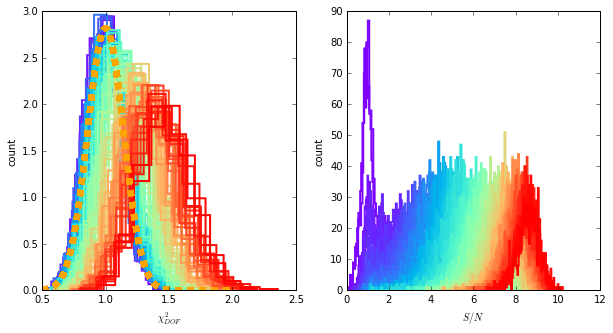

In [64]:
# plot the histogram of chi2dof 
from matplotlib.pyplot import cm 

print('Number of iterations is %d'%len(stats[A]['mean']))
colors=cm.rainbow(np.linspace(0,1,len(A_values)))
fig,ax  = plt.subplots(1,2, figsize=(10,5))
for A, col in zip(A_values,colors) : 
    bins = np.linspace(0.5,2,100)
    sigma  = np.sqrt(2/N)
    mu = 1
    import gc ; gc.collect()
    ax[0].plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), 
               lw=6, color='orange', ls='--', alpha=0.5) # overplotting Gaussian curve 
    ax[0].hist(stats[A]['chi2dof'], histtype='step', label='A='+str(A), color = col, normed=True, lw=2)  # chi2 
    ax[1].hist(stats[A]['mean'] / stats[A]['stdev'], histtype='step', label='A='+str(A),color = col, lw=2, bins=100)  # S/N 
    exp_SN = A / (sigma_0*np.sqrt(2/N))
    #ax[1].axvline(exp_SN, ls='--',color = col, lw=2)
    #print('For A=%f, we expect <S/N> = %f'%(A,exp_SN))
    #ax[0].legend(loc='upper right')
    #ax[1].legend(loc='upper right')
    #ax[0].set_title(r'$\chi^{2}_{DOF}$')
    #ax[1].set_title(r'$S/N$')
    ax[0].set_ylabel('count')
    ax[1].set_ylabel('count')
    ax[0].set_xlabel(r'$\chi^{2}_{DOF}$')
    ax[1].set_xlabel(r'$S/N$')
plt.savefig('../data_products/chi_sq_dof_SN_histograms.png')

## Completeness curve

Given A, we calculate what fraction is above a certain $S/N$ : choose $S/N=3$ or $5$ to make two completeness curves : plot of completeness vs $A/\sigma$

Completeness is defined as a fraction of all runs that are above a given $S/N$. 

In [65]:
frac = {}
SN_cuts = [3,5]
for SN_cut in SN_cuts :  # choose which completeness curve 
    frac[SN_cut] = np.zeros(len(A_values))
    i = 0 
    for A in A_values :  # for each A, calculate fraction greater than given SN 
        
        SN = stats[A]['mean'] / stats[A]['stdev']
        frac[SN_cut][i] = np.sum(SN > SN_cut) / float(len(SN))
        i += 1 

In [66]:
frac

{3: array([ 0.005,  0.004,  0.   ,  0.007,  0.026,  0.052,  0.104,  0.195,
         0.292,  0.372,  0.476,  0.559,  0.625,  0.681,  0.76 ,  0.808,
         0.833,  0.873,  0.888,  0.919,  0.935,  0.952,  0.959,  0.962,
         0.963,  0.977,  0.984,  0.988,  0.984,  0.991,  0.99 ,  0.991,
         0.998,  0.994,  0.998,  0.999,  0.998,  0.999,  1.   ,  1.   ,
         0.999,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
         1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
         1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
         1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
         1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
         1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
         1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
         1.   ,  1.   ,  1.   ,  1.   ]),
 5: array([ 0.   ,  0.001,  0.   ,  0.   ,  0.   ,  0.001,  0.   ,  0.   ,
         0.   , 

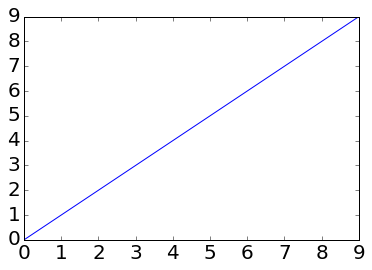

In [116]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
inline_rc = dict(mpl.rcParams)
plt.plot(range(10))

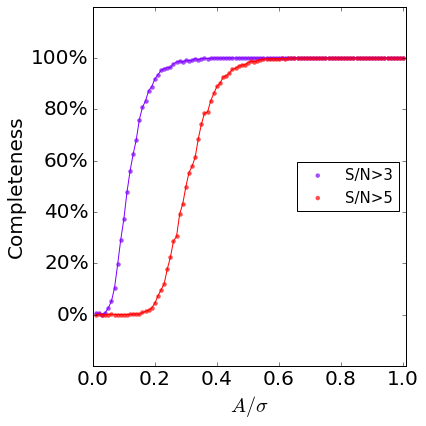

In [127]:
#http://matplotlib.org/users/customizing.html
#import matplotlib
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20) 
#font = {'family' : 'sans-serif',
#      'weight' : 'normal',
#        'size'   : 20}
#matplotlib.rc('text', usetex=True)
#matplotlib.rc('font', **font)
#from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
#rc('text', usetex=True)

plt.rc('text', usetex=False)
fig,ax = plt.subplots(figsize = (6,6))
colors=cm.rainbow(np.linspace(0,1,len(SN_cuts)))
for SN_cut, color in zip(SN_cuts,colors) : 
    ax.scatter(A_values, frac[SN_cut], label = 'S/N>'+str(SN_cut), lw=0, color=color, alpha=0.7)
    ax.plot(A_values, frac[SN_cut], color=color)
ax.set_xlabel(r'$A / \sigma$', fontsize=20)
ax.set_ylabel('Completeness', fontsize=20)
ax.set_xlim(0,1.01)
ax.set_yticks([0,0.2,0.4,0.6,0.8,1.0])
ax.set_yticklabels(['0%','20%','40%','60%','80%','100%'])
ax.legend(loc='center right',scatterpoints=1, fontsize=15 )
plt.tight_layout()
plt.savefig('../data_products/Completeness_curve.png')

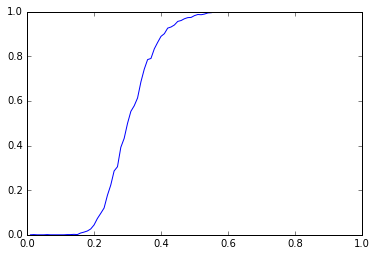

In [72]:
plt.plot(A_values, frac[SN_cut])

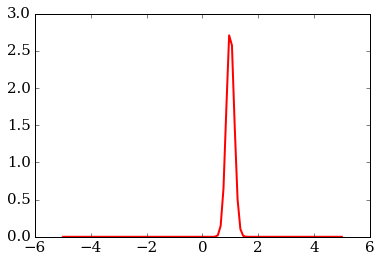

In [569]:
#plt.hist(np.sqrt(stats['chi2dof']), histtype='step')

# plot the Gaussian curve... Mean 1 , stdev sqrt(2/N)
bins = np.linspace(-5,5,100)
sigma  = np.sqrt(2/N)
mu = 1
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')

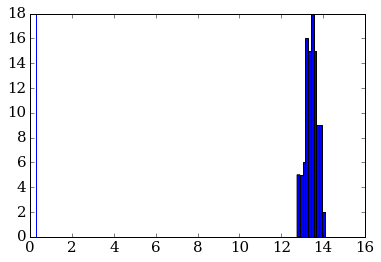

In [574]:
# Plot the S/N histogram : mean / stdev 

plt.hist(stats['mean'] / stats['stdev'])
plt.axvline(A / sig*np.sqrt(2/N))

In [502]:
p_sigma = plot_data['p_sigma'] 
sigma = plot_data['sigma']
del_sigma = (sigma[1]-sigma[0])

E = np.sum(p_sigma*sigma) / np.sum(p_sigma)

stdev = np.sqrt(np.sum(sigma*sigma*p_sigma)/ np.sum(p_sigma)  - E*E)

plt.scatter(sigma,p_sigma)
plt.axvline(E, color='green', ls='--')
plt.axvline(E+stdev, color='red', ls='--')
plt.axvline(E-stdev, color='red', ls='--')
